AI Road Safety

1. Data Acquisition 데이터 획득

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qHejzHzYtRrDLdWEJ0mi")
project = rf.workspace("cctv-project-wrsjx").project("project-mrd0g")
version = project.version(2)
dataset = version.download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to project-2 in yolov8:: 100%|██████████| 13364/13364 [00:02<00:00, 5216.06it/s]


2. Data Exploration 데이터 탐색

In [2]:

%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


3. modelling 모델링

In [3]:
import ultralytics

In [4]:
!yolo train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 6.23M/6.23M [00:00<00:00, 84.5MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/project-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

In [5]:
from IPython.display import Image

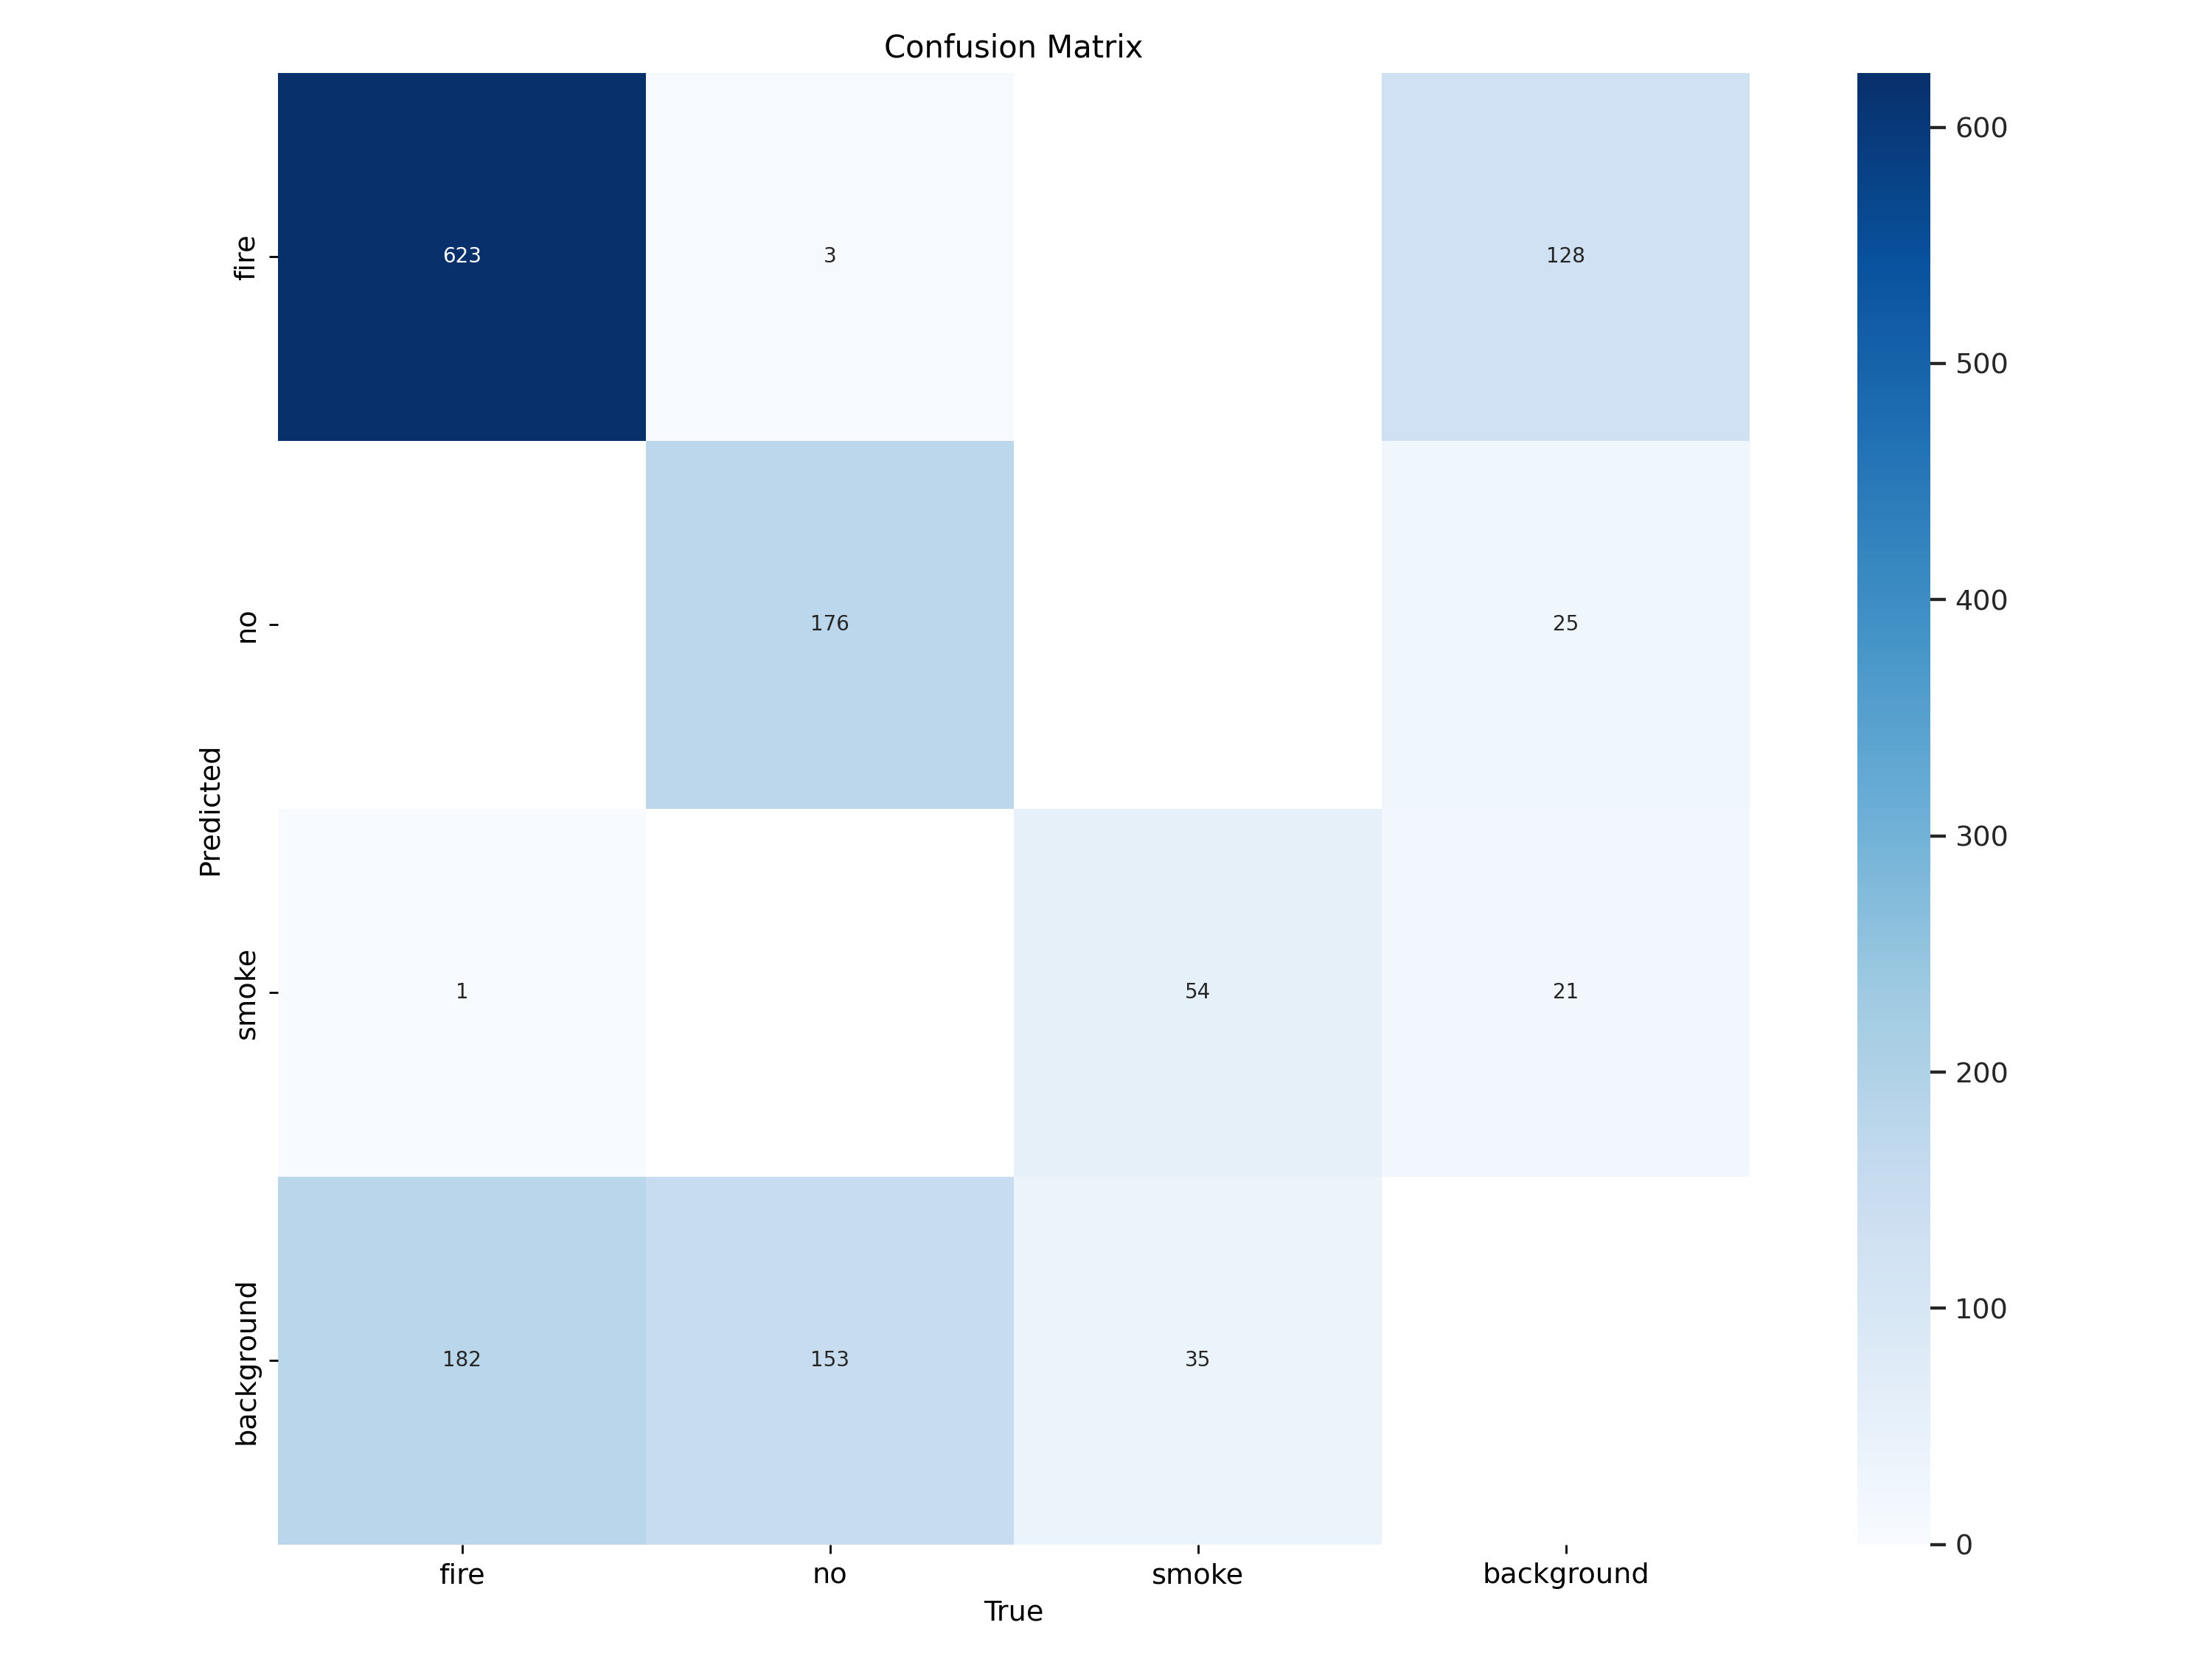

In [6]:
Image (filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

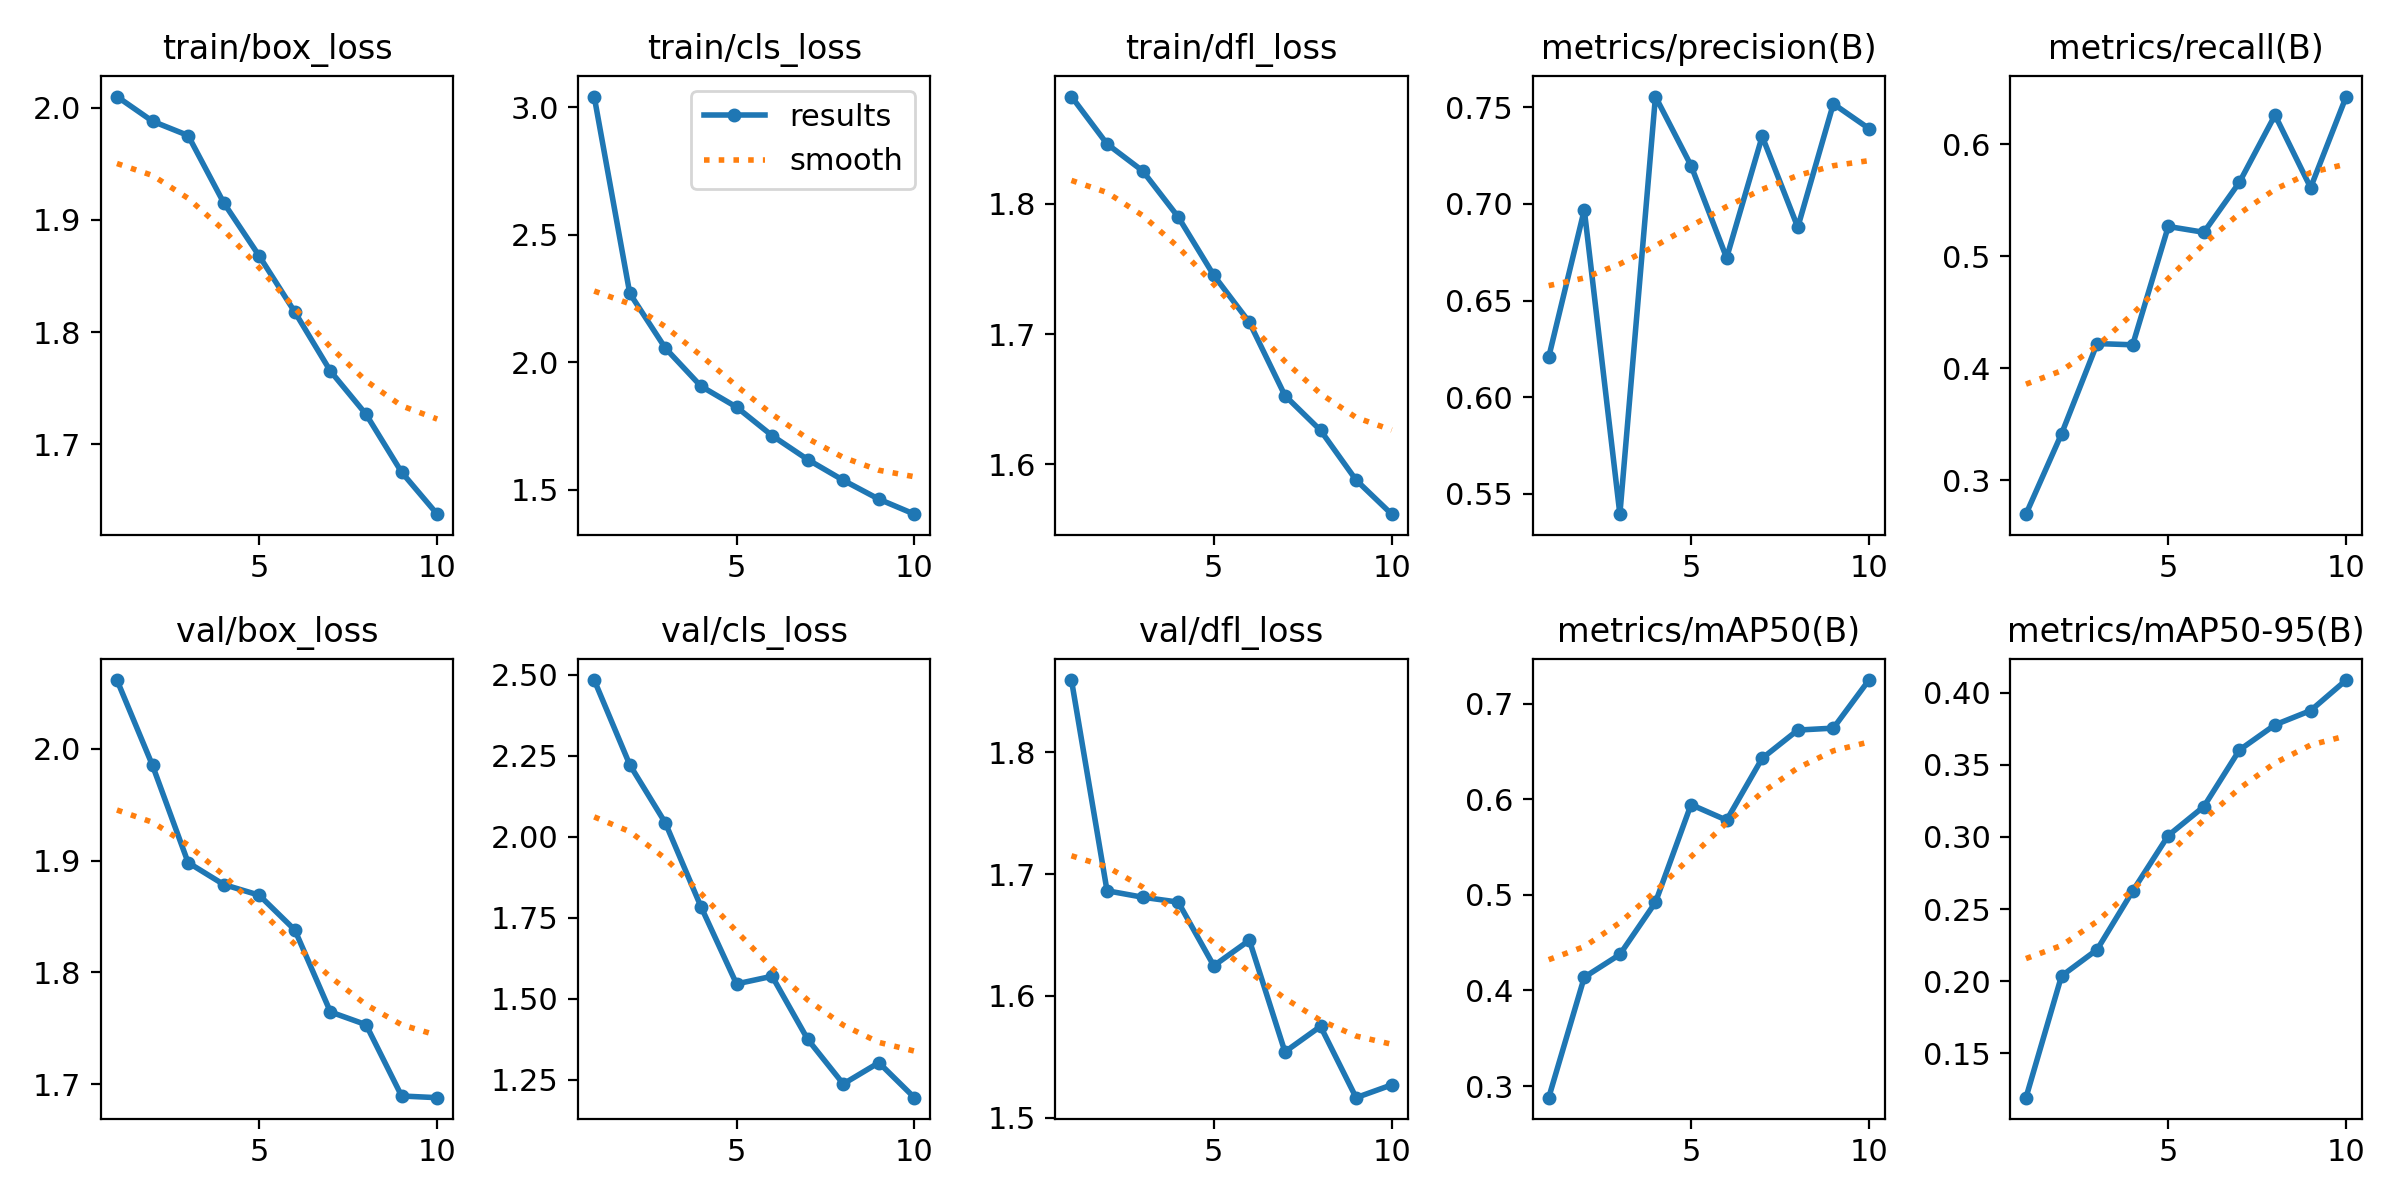

In [7]:
Image (filename=f'/content/runs/detect/train/results.png', width=600)

In [8]:
!yolo val model=/content/runs/detect/train/weights/best.pt data=/content/project-2/data.yaml

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/project-2/valid/labels.cache... 654 images, 0 backgrounds, 0 corrupt: 100% 654/654 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 41/41 [00:12<00:00,  3.23it/s]
                   all        654       1227      0.738      0.643      0.725      0.409
                  fire        654        806      0.735      0.748      0.774      0.396
                    no        654        332      0.825      0.539      0.716      0.385
                 smoke        654         89      0.653       0.64      0.685      0.446
Speed: 1.4ms preprocess, 5.5ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/valid/images conf=.25

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/654 /content/project-2/valid/images/00795895_L_jpg.rf.03b556f0ed518fbb739356783c03f09f.jpg: 640x640 3 nos, 22.6ms
image 2/654 /content/project-2/valid/images/1563118804170_0-_jpg.rf.c02b3da3b821e636ee40cbee12dd4da9.jpg: 640x640 2 nos, 11.7ms
image 3/654 /content/project-2/valid/images/1_mp4-11_jpg.rf.0d0e3e04be42de4d5de68b255db53694.jpg: 640x640 1 no, 15.1ms
image 4/654 /content/project-2/valid/images/1_mp4-13_jpg.rf.cd8ea914bb5ccc6f187416ba0cdc58c1.jpg: 640x640 1 no, 1 smoke, 11.3ms
image 5/654 /content/project-2/valid/images/1_mp4-21_jpg.rf.ab0f28137f02716045df3d3d54adda4f.jpg: 640x640 1 smoke, 11.2ms
image 6/654 /content/project-2/valid/images/1_mp4-31_jpg.rf.a4bbb5a68333c9ab271e8bf382cd5f33.jpg: 640x640 (no detections), 11.6ms
image 7/654 /content/project-2/valid/images/1_mp4-37_jpg.rf.a4f4d16594829f049291238a

In [10]:
from ultralytics import YOLO

# Load a YOLOv8n PyTorch model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Export the model
model.export(format='openvino')  # creates 'yolov8n_openvino_model/'

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['openvino>=2023.3'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 91.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.7s, installed 1 package: ['openvino>=2023.3']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.0.0-14509-34caeefd078-releases/2024/0...
OpenVINO: export success ✅ 12.7s, saved as '/content/runs/detect/train/weights/best_openvino_model/' (11.8 MB)

Export complete (14.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train

'/content/runs/detect/train/weights/best_openvino_model'

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%mkdir /content/drive/My\ Drive/R2_D2_Fire_Detection/

In [14]:
%cp /content/runs/detect/train/weights/best_openvino_model/best.bin /content/drive/My\ Drive/R2_D2_Fire_Detection/models
%cp /content/runs/detect/train/weights/best_openvino_model/best.xml /content/drive/My\ Drive/R2_D2_Fire_Detection/models
%cp /content/runs/detect/train/weights/best_openvino_model/metadata.yaml /content/drive/My\ Drive/R2_D2_Fire_Detection/models